In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

#### Getting some data with outliers

Getting some data from one of the wells used in Alessandro Amato del Monte's [Seismic rock physics](https://github.com/seg/tutorials-2017#june-2017)  geophysical tutorial on The Leading Edge

In [2]:
L=pd.read_csv('qsiwell5.csv', index_col=0)

In [3]:
#### Alessandro's plotting routine

In [4]:
# define basic styles for plotting log curves (sty0), sand (sty1) and shale (sty2)
sty0={'lw':1, 'color':'k', 'ls':'-'}
sty1={'marker':'o', 'color':'g', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}
sty2={'marker':'o', 'color':'r', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}

def plotlog(L, z1, z2, cutoff_sand, cutoff_shale): 
    # define filters to select sand (ss) and shale (sh)
    ss= (L.index>=z1) & (L.index<=z2) & (L.VSH<=cutoff_sand)
    sh= (L.index>=z1) & (L.index<=z2) & (L.VSH>=cutoff_shale)

    # plot figure    
    f = plt.subplots(figsize=(14, 6))
    ax0 = plt.subplot2grid((1,9), (0,0), colspan=1) # gr curve
    ax1 = plt.subplot2grid((1,9), (0,1), colspan=1) # ip curve
    ax2 = plt.subplot2grid((1,9), (0,2), colspan=1) # vp/vs curve
    ax3 = plt.subplot2grid((1,9), (0,3), colspan=3) # crossplot phi - vp
    ax4 = plt.subplot2grid((1,9), (0,6), colspan=3) # crossplot ip - vp/vs

    ax0.plot(L.VSH[ss], L.index[ss], **sty1)
    ax0.plot(L.VSH[sh], L.index[sh], **sty2)
    ax0.plot(L.VSH, L.index, **sty0)
    ax0.set_xlabel('VSH')
    ax0.locator_params(axis='x', nbins=2)

    ax1.plot(L.IP[ss], L.index[ss], **sty1)
    ax1.plot(L.IP[sh], L.index[sh], **sty2)
    ax1.plot(L.IP, L.index,  **sty0)
    ax1.set_xlabel('$I_\mathrm{P}$')
    ax1.set_xlim(4e3,8e3)
    ax1.locator_params(axis='x', nbins=2)

    ax2.plot(L.VPVS[ss], L.index[ss], **sty1)
    ax2.plot(L.VPVS[sh], L.index[sh], **sty2)
    ax2.plot(L.VPVS, L.index, **sty0)
    ax2.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$')
    ax2.set_xlim(1.5,3)
    ax2.locator_params(axis='x', nbins=2)

    ax3.plot(L.PHIE[ss], L.VP[ss], **sty1)
    ax3.set_xlim(0,0.4),  ax3.set_ylim(2e3,4e3)
    ax3.set_xlabel('$V_\mathrm{P}$ vs $\phi_\mathrm{e}$')

    ax4.plot(L.VP*L.RHO[ss], L.VP/L.VS[ss], **sty1)
    ax4.plot(L.VP*L.RHO[sh], L.VP/L.VS[sh], **sty2)
    ax4.set_xlim(4e3,8e3),  ax4.set_ylim(1.5,3)
    ax4.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$ vs $I_\mathrm{P}$')

    for aa in [ax0,ax1,ax2]:
        aa.set_ylim(z2,z1)
#         aa.axhline(2153, color='k', ls='-')
#         aa.axhline(2183, color='k', ls='--')
    for aa in [ax0,ax1,ax2,ax3,ax4]:
        aa.tick_params(which='major', labelsize=8)
    for aa in [ax1,ax2]:
        aa.set_yticklabels([])
    plt.subplots_adjust(wspace=.8,left=0.05,right=0.95)
    

    plt.show()

Plot of VSH (shale volume) and SW (water saturation) logs in the first track, then IP (acoustic impedance) in the second and VP/VS in the third track respectively; sands highlighted in green and shales in red.
Next to these 3 tracks crossplots of  PHIE (effective porosity) vs VP (P-wave velocity) and IP against VP/VS

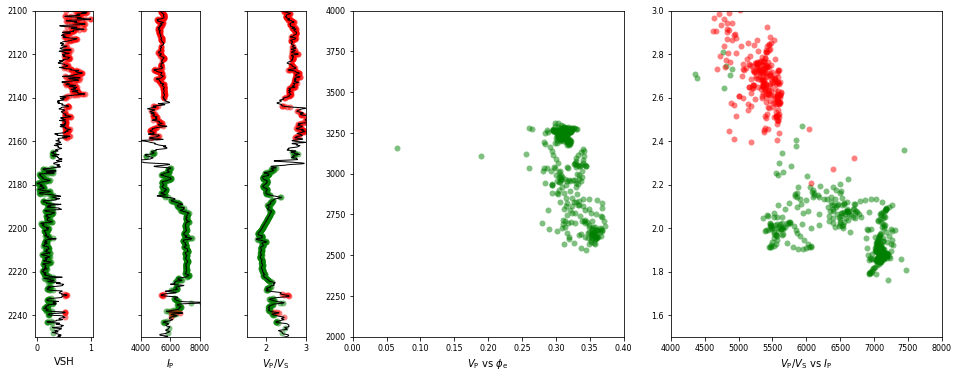

In [5]:
plotlog(L,2100,2250,0.3,0.5)

#### Looking at the relationship between Vp and Vs in his defined sand interval scatterplot, CC

In [6]:
ss= (L.index>=2100) & (L.index<=2250) & (L.VSH<=0.3)

In [7]:
r1 = (L['VP'][ss]).corr(L['VS'][ss], 'spearman')

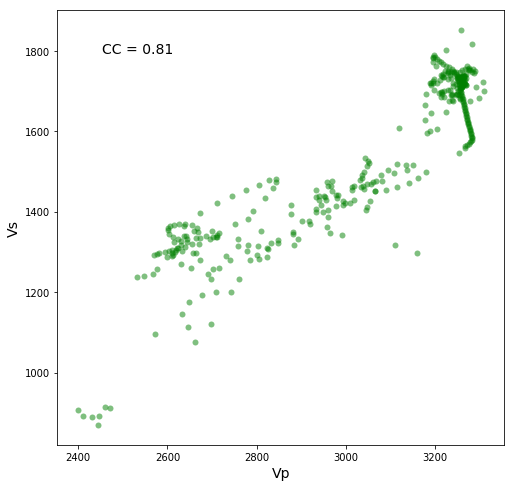

In [8]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Vp', fontsize = '14')
ax.set_ylabel('Vs', fontsize = '14')

ax.annotate("CC = {:.2f}".format(r1), xy=(.1, .9), xycoords=ax.transAxes, size = 14)
ax.plot(L['VP'][ss], L['VS'][ss], **sty1);


#### Find outliers
https://stackoverflow.com/questions/10231206/can-scipy-stats-identify-and-mask-obvious-outliers